In [ ]:
from yroots.utils import condeigs
from yroots.polyroots import solve
from yroots.Multiplication import *
import yroots as yr
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
from tests.devastating_example_test_scripts import *
from tests.growth_factors import
from scipy.stats import linregress
from scipy.spatial.distance import pdist
%load_ext autoreload
%autoreload 2

#### most of the functions in this notebook are in tests/growth_factors.py. There is some documentation, but certainly not the most thorough, so feel free to ask my any questions. - Sue

#### From Hayden's JMM Presentation:

Recall that the condition number of a simple root $z$ of $f:\mathbb{R}^n\mapsto\mathbb{R}^n$ is:
    $$\kappa(z,f) = \left\lVert{Df(z)^{-1}}\right\rVert_2$$
and that the condition number of a simple eigenvalue $\lambda$ of A such that $Ax = \lambda x$ and $A^*y = \lambda y$ is:
    $$\kappa(\lambda,A) = \frac{\left\lVert{x}\right\rVert \left\lVert{y}\right\rVert}{|y^*x|}$$
    
Define the **growth factor** for a M\"oller-Stetter eigenproblem for an eigenvalue $\lambda$ corresponding to a root $z$ to be:
    $$GF(\lambda,z,f,m_h) = \log_{10}\frac{\kappa(\lambda,m_h)}{\kappa(z,f)}$$
    
This measures how many additional digits of precision may be lost when converting the root-finding problem into an eigenproblem.

<img src="growthfactor.png" width=600 height=600 />


# loading in data saved from the server

### random systems

In [2]:
folder = 'tests/growth_factors/rand/newton/'
normal_masks = {d:~np.load(folder+f'dim{d}/not_full_roots_deg2.npy')\
                for d in range(3,7)}
normal_masks[7] = np.ones(200,dtype=bool)
normal_masks[2] = np.ones(300,dtype=bool)
rand_polished = {d:np.stack(np.load(folder+f'dim{d}/deg2_res.npy',
                                allow_pickle=True)[normal_masks[d]])
                      for d in range(2,8)}
rand_polished[8] = np.stack([np.load(folder+f'dim8/deg2_sys{i}.npy')
                                 for i in range(23)])
for d in rand_polished.keys():
    print(rand_polished[d].shape)

(300, 2, 4)
(295, 3, 8)
(298, 4, 16)
(298, 5, 32)
(198, 6, 64)
(200, 7, 128)
(23, 8, 256)


### devastating systems

In [3]:
folder = 'tests/growth_factors/dev/newton/'
dev_polished = {d:np.stack(np.load(folder+f'dim{d}/deg2.npy',
                                allow_pickle=True))
                      for d in range(2,7)}
dev_polished[7] = [np.load(folder+f'dim7/deg2_sys{i}.npy',
                                    allow_pickle=True)
                                 for i in range(45)]
dev_polished[8] = [np.load(folder+f'dim8/deg2_sys{i}.npy',
                                    allow_pickle=True)
                                 for i in range(25)]
#I accidentally saved the converging root info-- so let's check that out now and then remove it
for d in dev_polished.keys():
    for i,sys in enumerate(dev_polished[d]):
        if d > 6:
            sys = sys[0]
        gf,newt_dist,root_dist = sys
        if not 10*newt_dist < root_dist:
            print(d,i)
            print('**Potentially converging roots with polishing**')
            print(f'\tNewton changed roots by at most: {newt_dist}')
            print(f'\tDist between root was at least:  {root_dist}')
    dev_polished[d] = np.array([sys[0] for sys in dev_polished[d]])
for d in [7,8]:
    dev_polished[d] = np.array([sys[0] for sys in dev_polished[d]])
for d in dev_polished.keys():
    print(dev_polished[d].shape)  

(50, 2)
(50, 3)
(50, 4)
(50, 5)
(50, 6)
(45, 7)
(25, 8)


### comparison to without polishing

folder = 'tests/growth_factors/rand/nopol/'
normal_masks_nopol = {d:~np.load(folder+f'dim{d}/not_full_roots_deg2.npy') for d in range(3,5)}
normal_masks_nopol[2] = np.ones(300,dtype=bool)
rand_nopol = {d:np.stack(np.load(folder+f'dim{d}/deg2_res.npy',
                                allow_pickle=True)[normal_masks_nopol[d]])
                      for d in range(2,5)}
for d in rand_nopol.keys():
    print(rand_nopol[d].shape)

folder = 'tests/growth_factors/dev/nopol/'
dev_nopol = {d:np.stack(np.load(folder+f'dim{d}/deg2.npy',
                                allow_pickle=True))
                      for d in range(2,5)}
for d in dev_nopol.keys():
    print(dev_nopol[d].shape)  

summary: it was practically the same, but polishing the denominator (root) did seem to make it ever so slightly more accurate, so let's go with that.

# devastating example
run the same code on devastating examples with eps = .1 to show empirical line, and with a perturbed coefficient tensor too to show it gets nicer if you do that

In [15]:
gf_dev_1 = devestating_growth_factors([2,3,4],.1,'power',newton=False,save=False)

Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
2

In [17]:
gf_dev_2 = devestating_growth_factors([2,3,4],.01,'power',newton=False,save=False)

Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
2

In [18]:
gf_dev_1_delta3 = devestating_growth_factors([2,3,4],.1,'power',perturb_eps=.001,newton=False,save=False)

Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
2

In [20]:
gf_dev_2_delta_1 = devestating_growth_factors([2,3,4],.01,'power',newton=False,save=False,perturb_eps=.1)

Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
2

In [21]:
gf_dev_2_delta_2 = devestating_growth_factors([2,3,4],.01,'power',newton=False,save=False,perturb_eps=.01)


Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
2

In [22]:
gf_dev_2_delta3 = devestating_growth_factors([2,3,4],.01,'power',newton=False,save=False,perturb_eps=.001)

Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
2

In [23]:
gf_dev_2_delta4 = devestating_growth_factors([2,3,4],.01,'power',newton=False,save=False,perturb_eps=.0001)

Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
2

In [24]:
gf_dev_2_delta_5 = devestating_growth_factors([2,3,4],.01,'power',newton=False,save=False,perturb_eps=.00001)

Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
2

devastating Systems, $\epsilon=.1$
Slope: 0.9995766983201142 
Intercept: -0.9966392107578774

Perturbed devastating Systems, $\epsilon=.1, \delta=.001$
Slope: 1.0006052110011103 
Intercept: -1.0540303097219565

Random Systems
Slope: 0.049974162632344575 
Intercept: 0.20151817188668214



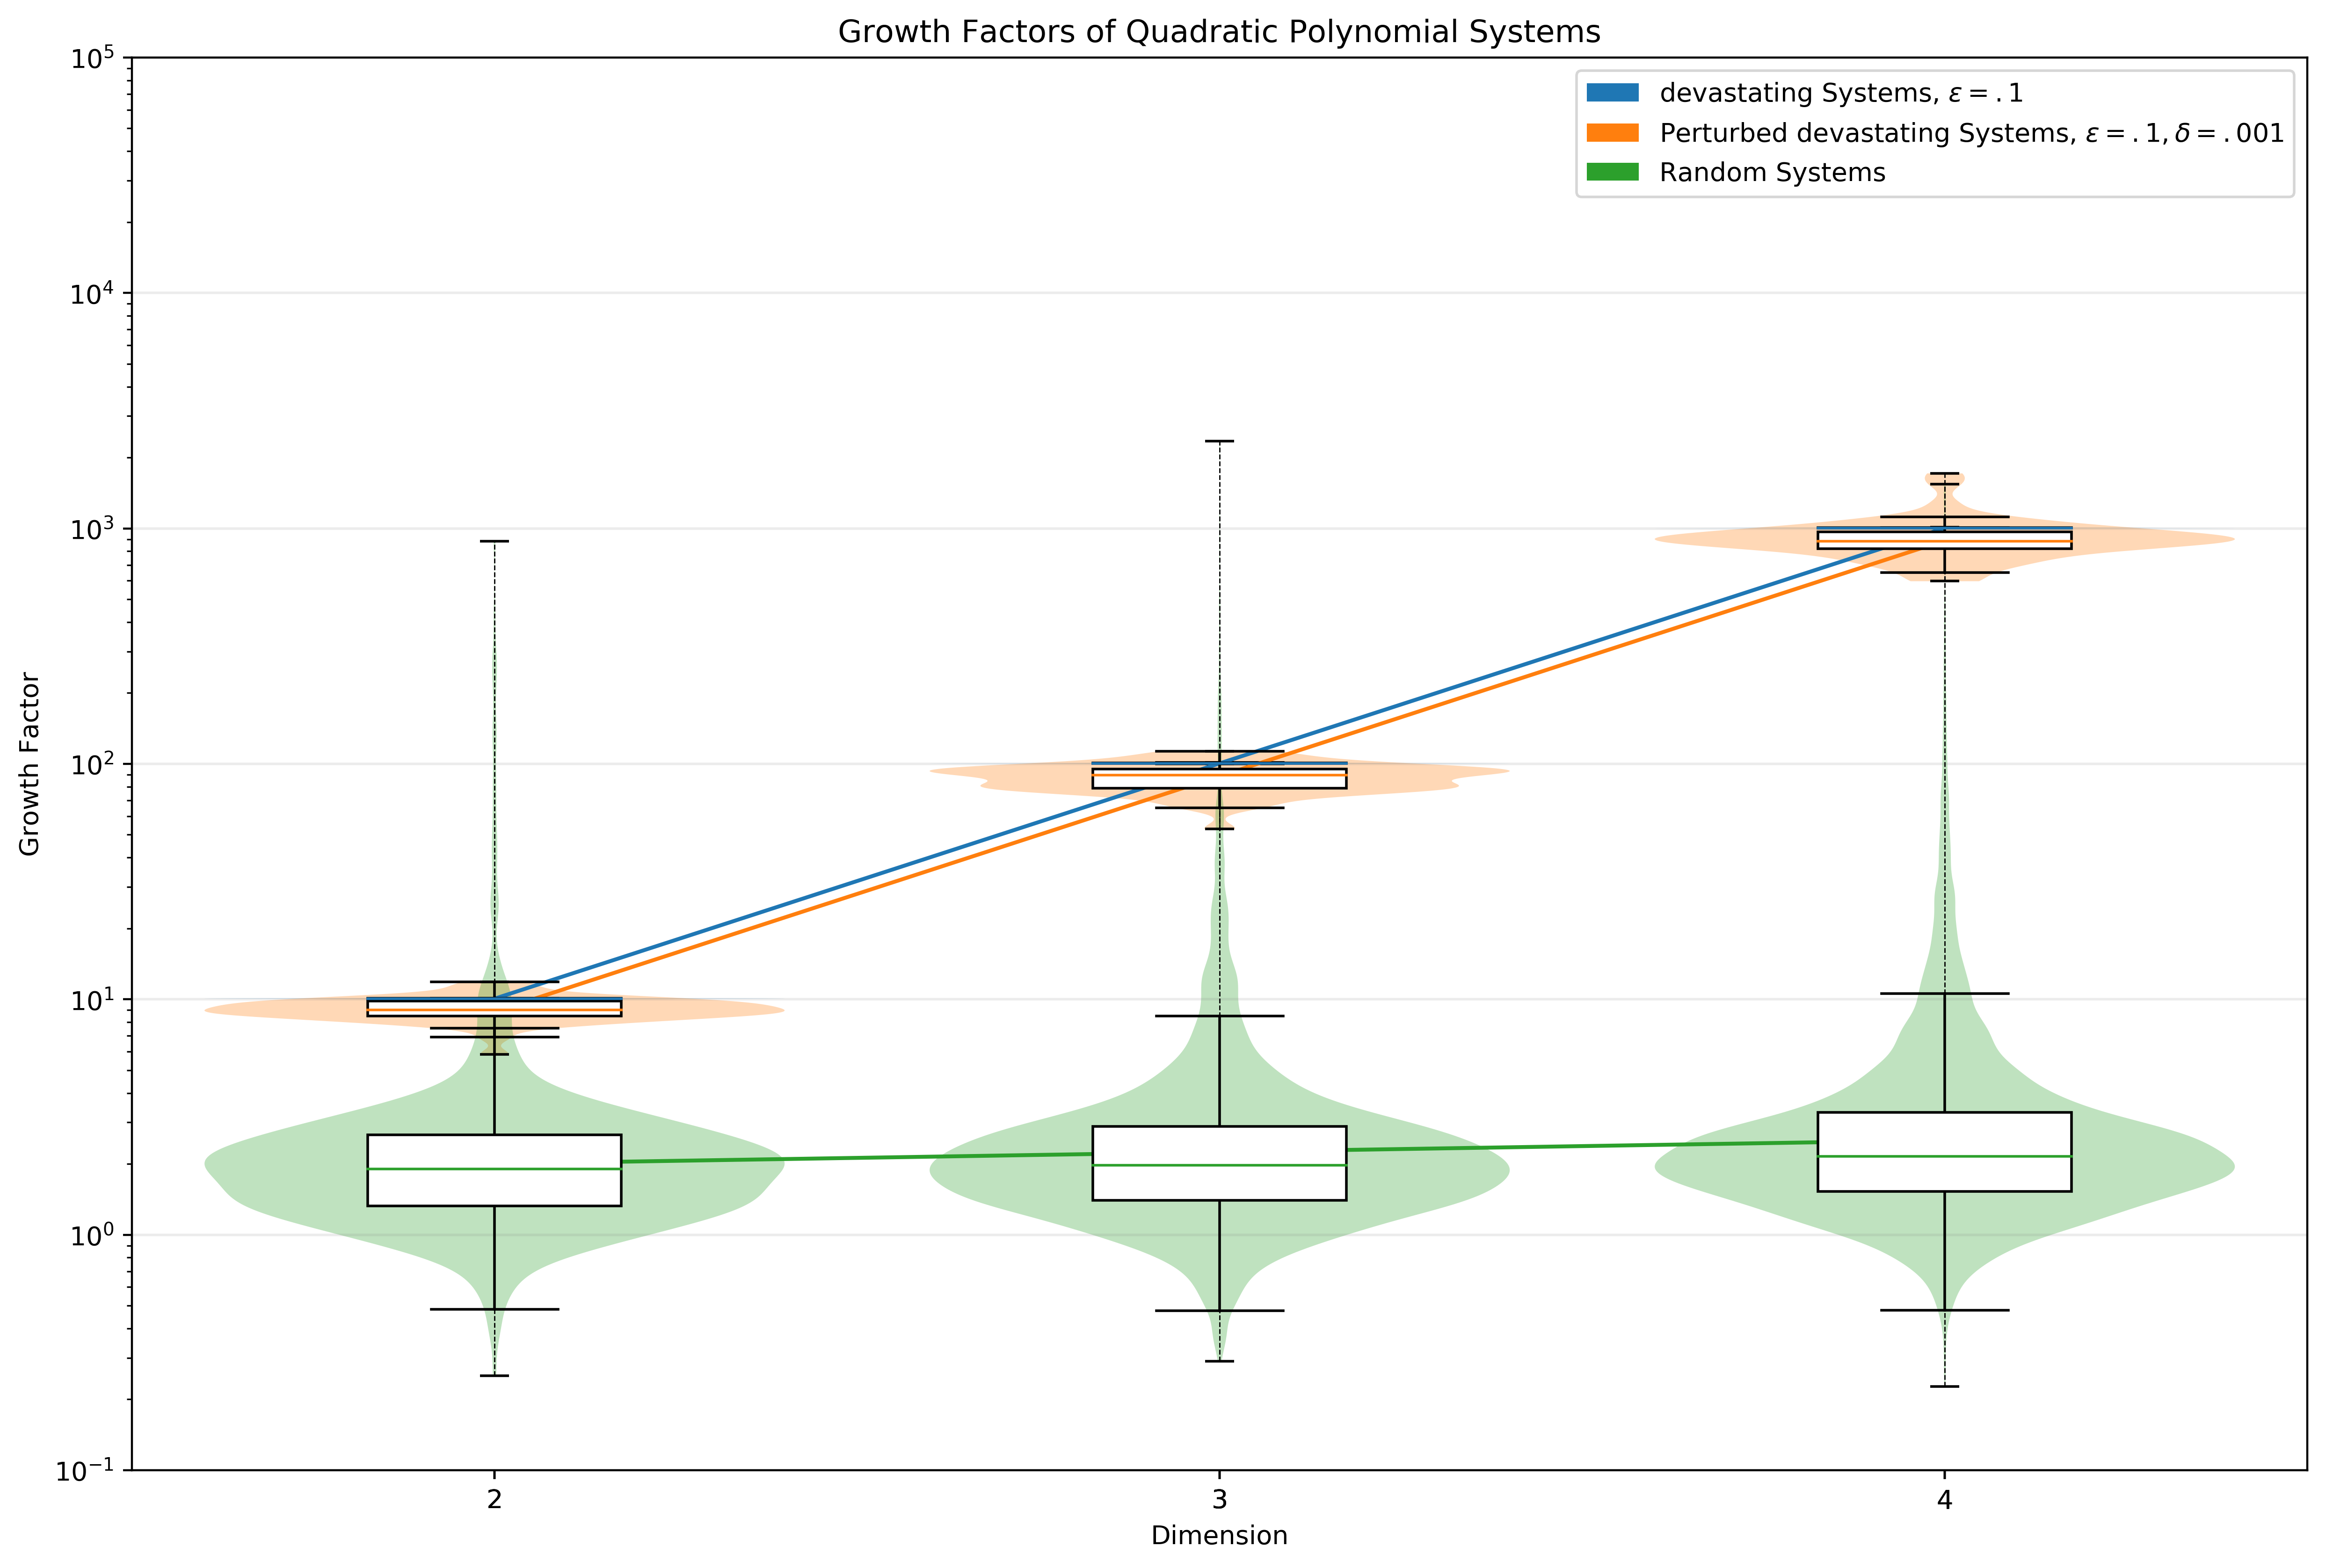

In [72]:
plot([gf_dev_1,
      gf_dev_1_delta3,
      {d:rand_polished[d] for d in range(2,5)}],
     [r'devastating Systems, $\epsilon=.1$',
      r'Perturbed devastating Systems, $\epsilon=.1, \delta=.001$',
      r'Random Systems'],
     figsize=(15,10))

devastating Systems, $\epsilon=.01$
Slope: 1.99999853923155 
Intercept: -1.9999733345944675

Perturbed devastating Systems, $\epsilon=.01, \delta=.1$
Slope: 0.4130133594593585 
Intercept: -0.5607253048220882

Perturbed devastating Systems, $\epsilon=.01, \delta=.01$
Slope: 0.920409745658012 
Intercept: -1.0900875820766205

Perturbed devastating Systems, $\epsilon=.01, \delta=.001$
Slope: 1.333339472793583 
Intercept: -1.4763311708869438

Perturbed devastating Systems, $\epsilon=.01, \delta=.0001$
Slope: 1.7642487415358612 
Intercept: -1.862662605212451

Perturbed devastating Systems, $\epsilon=.01, \delta=.00001$
Slope: 2.0002693537571408 
Intercept: -2.0550149918994265

Random Systems
Slope: 0.049974162632344575 
Intercept: 0.20151817188668214



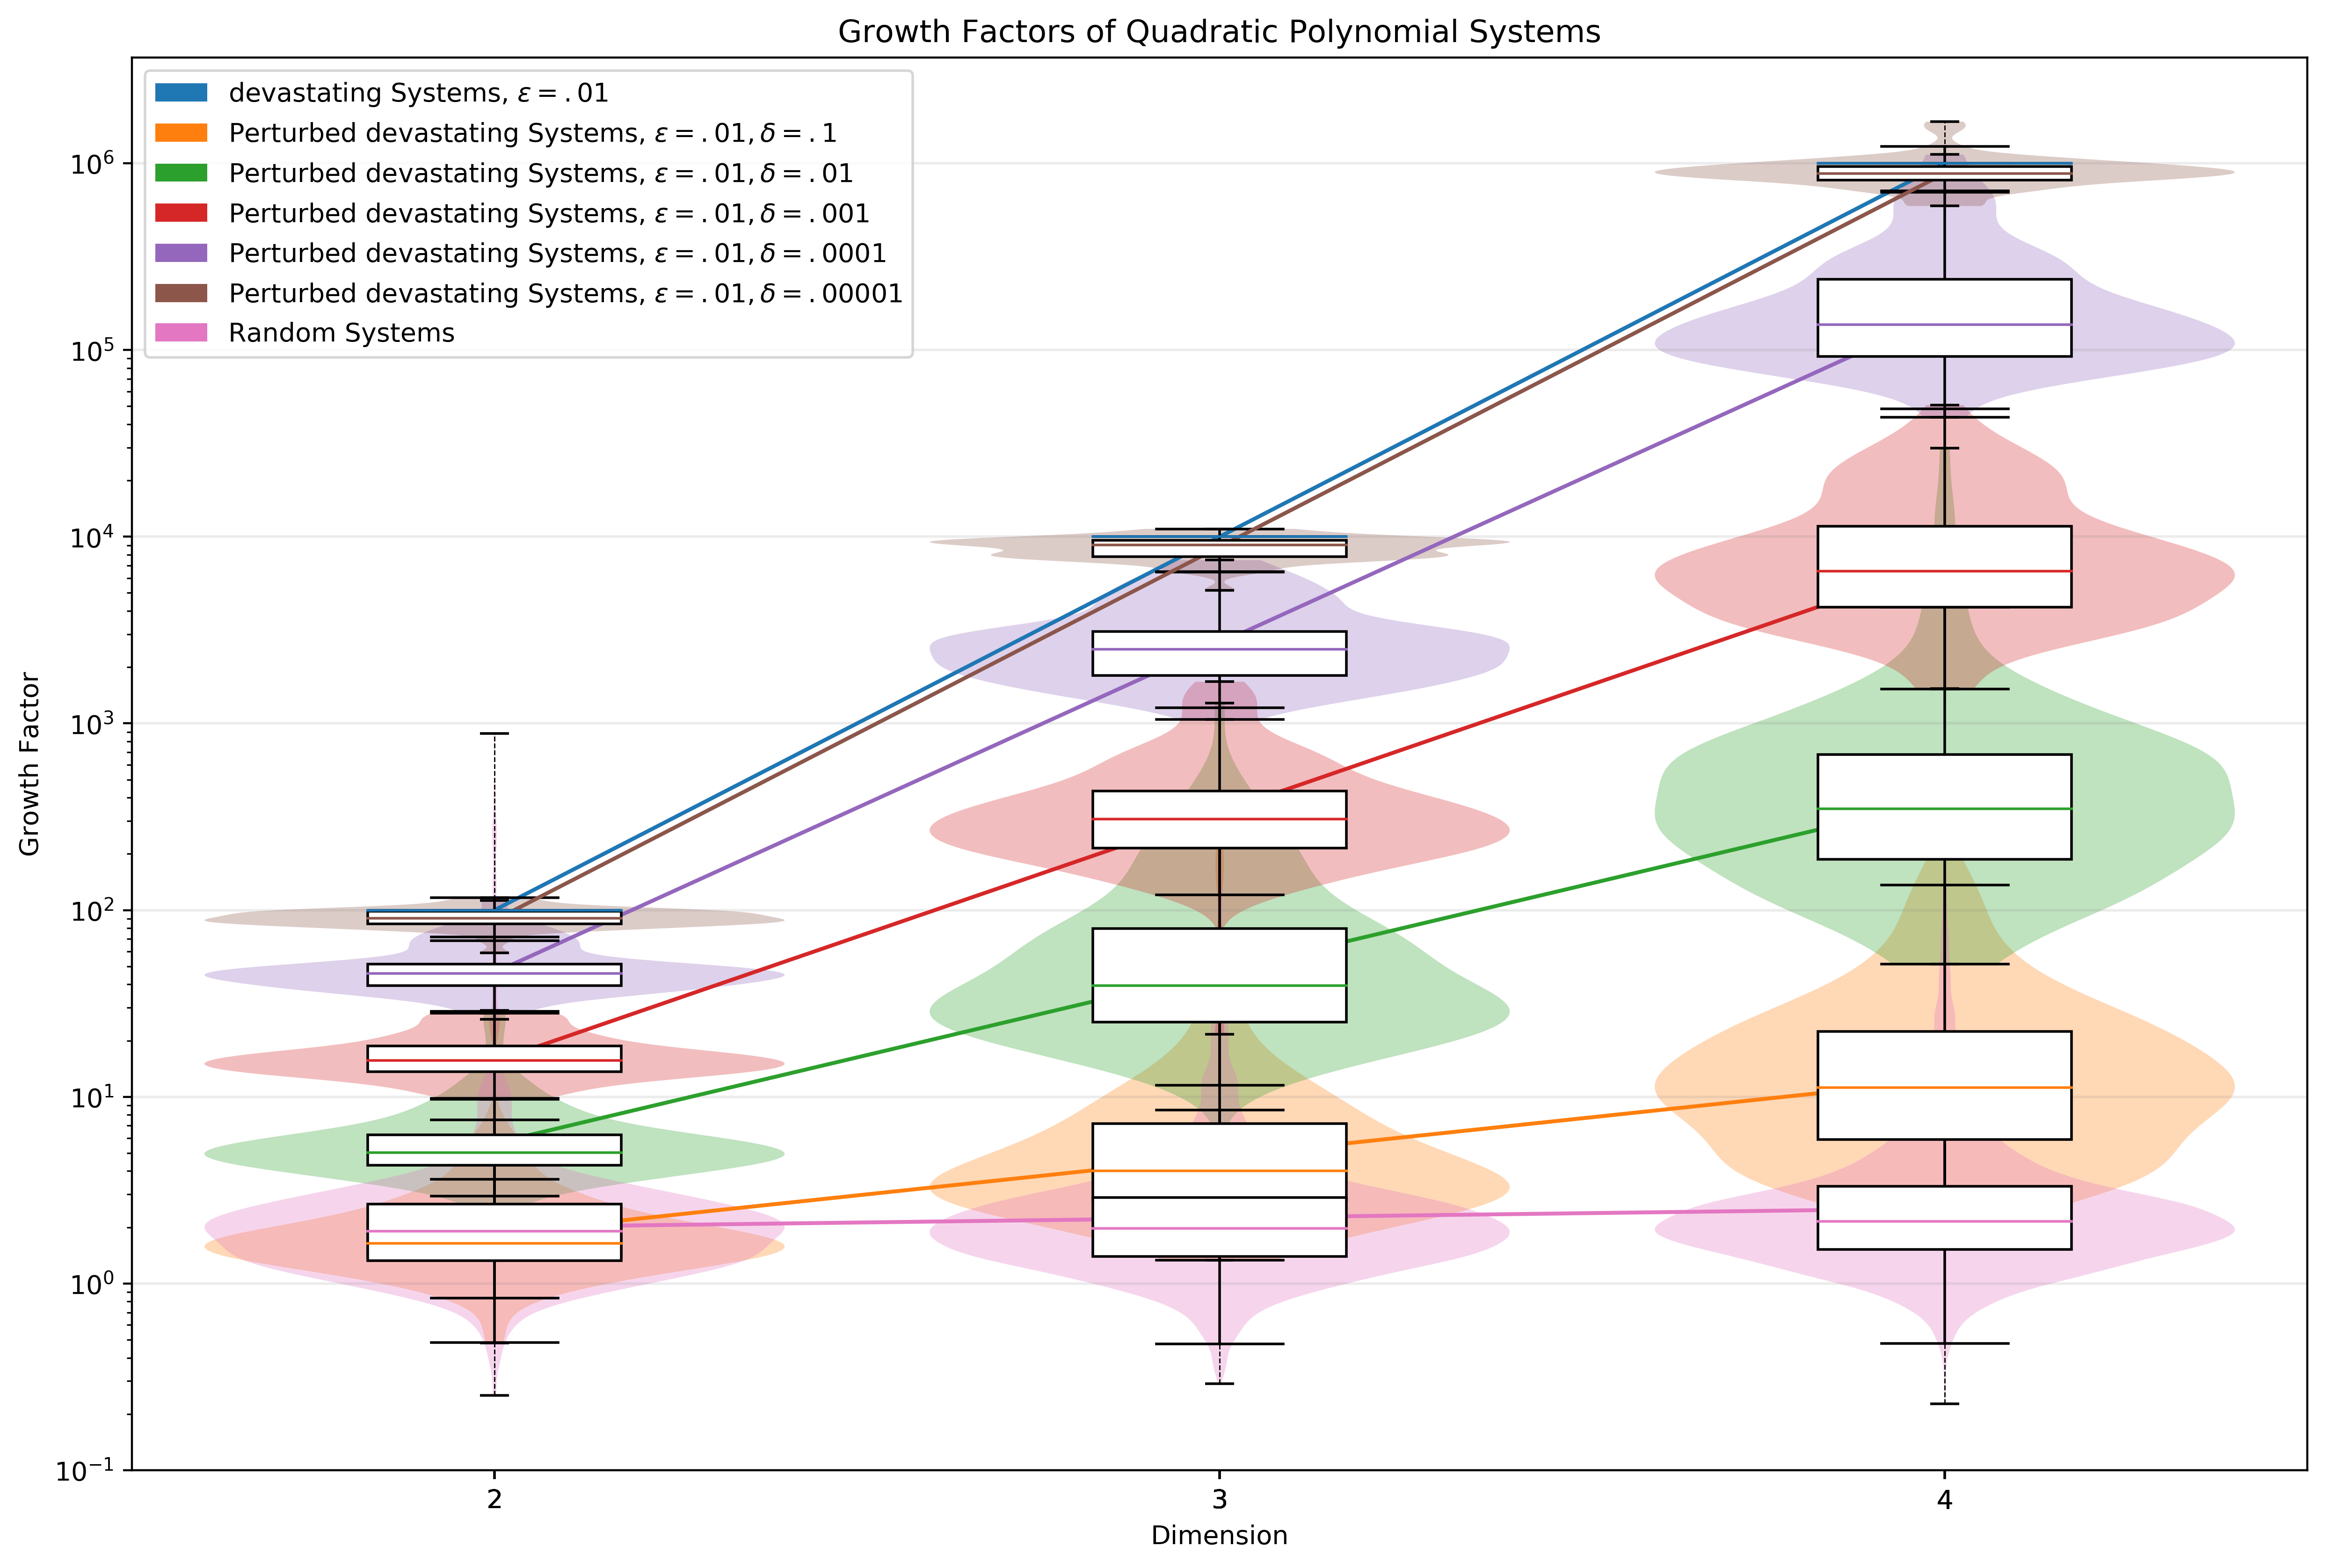

In [73]:
plot([gf_dev_2,
      gf_dev_2_delta_1,
      gf_dev_2_delta_2,
      gf_dev_2_delta3,
      gf_dev_2_delta4,
      gf_dev_2_delta_5,
      {d:rand_polished[d] for d in range(2,5)}],
     [r'devastating Systems, $\epsilon=.01$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.1$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.01$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.001$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.0001$',
      r'Perturbed devastating Systems, $\epsilon=.01, \delta=.00001$',
      r'Random Systems'],
     figsize=(15,10))

# How do the slopes of these lines decrease as you perturb more and more?

In [70]:
slopes = [1.99999853923155,
          2.0002693537571408,
          1.7642487415358612,
          1.333339472793583,
          0.920409745658012,
          0.4130133594593585]
deltas = [0,1e-5,1e-4,1e-3,1e-2,1e-1]

In [27]:
np.linspace(1e-5,1e-1)

array([1.00000000e-05, 2.05061224e-03, 4.09122449e-03, 6.13183673e-03,
       8.17244898e-03, 1.02130612e-02, 1.22536735e-02, 1.42942857e-02,
       1.63348980e-02, 1.83755102e-02, 2.04161224e-02, 2.24567347e-02,
       2.44973469e-02, 2.65379592e-02, 2.85785714e-02, 3.06191837e-02,
       3.26597959e-02, 3.47004082e-02, 3.67410204e-02, 3.87816327e-02,
       4.08222449e-02, 4.28628571e-02, 4.49034694e-02, 4.69440816e-02,
       4.89846939e-02, 5.10253061e-02, 5.30659184e-02, 5.51065306e-02,
       5.71471429e-02, 5.91877551e-02, 6.12283673e-02, 6.32689796e-02,
       6.53095918e-02, 6.73502041e-02, 6.93908163e-02, 7.14314286e-02,
       7.34720408e-02, 7.55126531e-02, 7.75532653e-02, 7.95938776e-02,
       8.16344898e-02, 8.36751020e-02, 8.57157143e-02, 8.77563265e-02,
       8.97969388e-02, 9.18375510e-02, 9.38781633e-02, 9.59187755e-02,
       9.79593878e-02, 1.00000000e-01])

In [32]:
deltas,slopes = list(deltas),list(slopes)
for delta in np.linspace(1e-5,1e-1):
    data = devestating_growth_factors([2,3,4],.01,
                                      'power',
                                      newton=False,
                                      save=False,
                                      perturb_eps=delta)
    data_log10 = [np.log10(data[d].flatten()) for d in data.keys()]
    points = np.array([[d,val] for i,d in enumerate(data.keys()) for val in data_log10[i]])
    slope = linregress(points)[0]
    deltas.append(delta)
    slopes.append(slope)

Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
2

8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 d

20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41

25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
Devest

38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
1

50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
2

12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
Devestating Example in dimensions [2, 3, 4]
2
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33

30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
3
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
4
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
12 done
13 done
14 done
15 done
16 done
17 done
18 done
19 done
20 done
21 done
22 done
23 done
24 done
25 done
26 done
27 done
28 done
29 done
30 done
31 done
32 done
33 done
34 done
35 done
36 done
37 done
38 done
39 done
40 done
41 done
42 done
43 done
44 done
45 done
46 done
47 done
48 done
49 done
50 done
Devestating Example in dimensions [2, 3, 4]
2


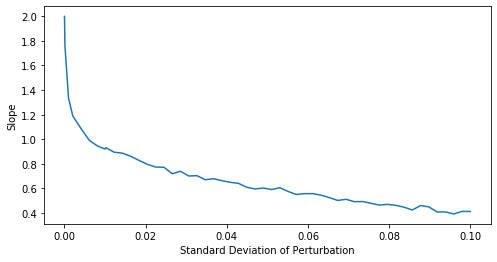

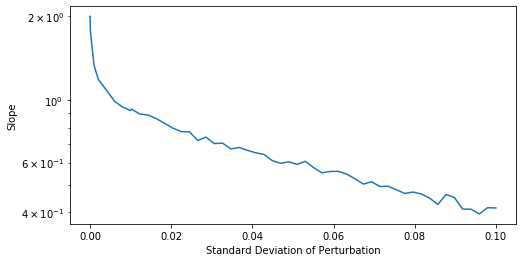

In [66]:
srt = np.argsort(deltas)
deltas = np.array(deltas)
slopes = np.array(slopes)
plt.figure(figsize=(8,4))
plt.plot(deltas[srt],slopes[srt])
plt.xlabel('Standard Deviation of Perturbation')
plt.ylabel('Slope')
plt.show()
plt.figure(figsize=(8,4))
plt.semilogy(deltas[srt],slopes[srt])
plt.xlabel('Standard Deviation of Perturbation')
plt.ylabel('Slope')
plt.show()

summary: 

perturbing opens up new choices of basis

cond num probably isn't cont at zero

# plotting

plot([gf_dev_1,shifted_gf_dev_1,gf_dev_2,shifted_gf_dev_2],
     [r'devastating Systems, $\epsilon=.1$',r'Shifted devastating Systems, $\epsilon=.1$',
      r'devastating Systems, $\epsilon=.01$',r'Shifted devastating Systems, $\epsilon=.01$'],
     figsize=(15,10))

Random Systems
Slope: 0.042297149196839905 
Intercept: 0.24599742391990143

Devastating Systems, $\epsilon=.1$
Slope: 1.0000433894444425 
Intercept: -0.9981340387625659



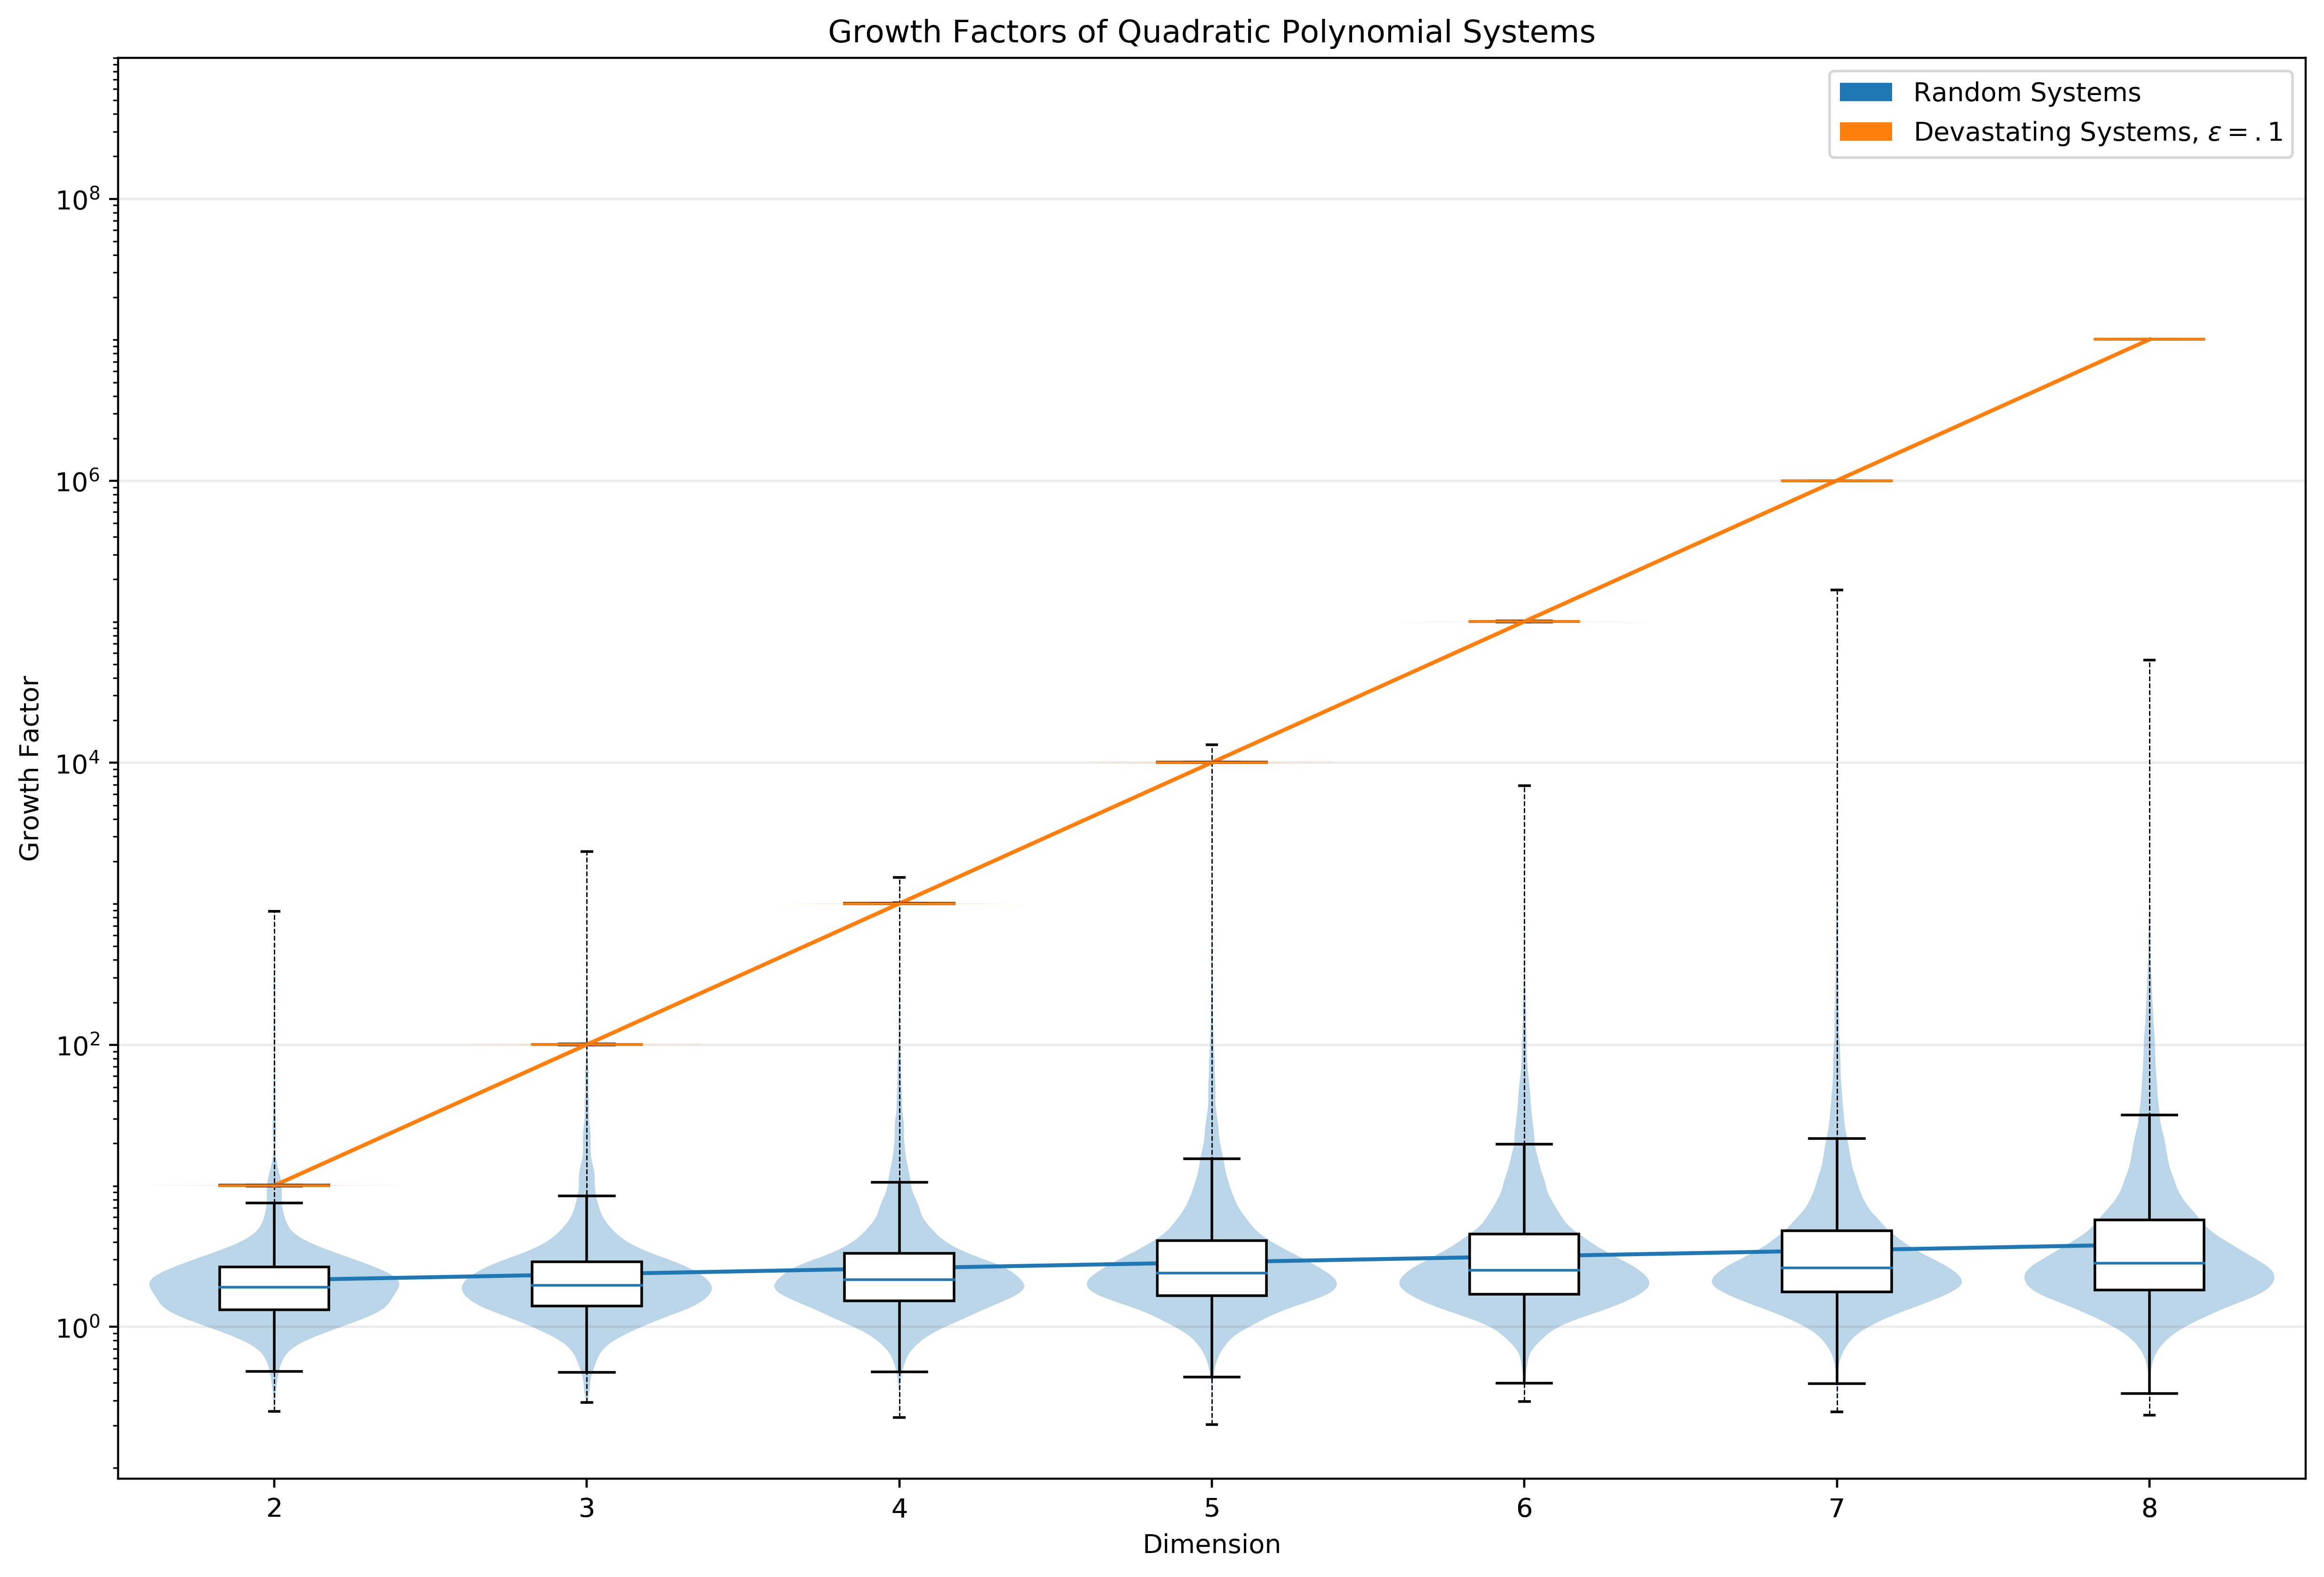

In [67]:
plot([rand_polished,dev_polished],
     ['Random Systems',r'Devastating Systems, $\epsilon=.1$'],
     figsize=(15,10))

#### FIGURES IN THE PAPER:
* figsize is the desired actual size in the final printed article, measured in inches -- controlable
* dpi at least 300 -- defaults to 400
* file type  pdf -- does that in saving
* bbox_inches = ‘tight’ -- does that in saving

In [37]:
def get_log_medians(data):
    return [np.median(np.log10(data[d])) for d in data.keys()]
def get_perc_neg(data):
    return [np.mean(np.log10(data[d])<0)*100 for d in data.keys()]

In [38]:
print('log medians')
print('Rand:',np.round(get_log_medians(rand_polished),4))
print('Dev :',np.round(get_log_medians(dev_polished),4))
print('Rand % Negative:',np.round(get_perc_neg(rand_polished),4))

log medians
Rand: [0.2801 0.2958 0.3331 0.3817 0.4027 0.4176 0.452 ]
Dev : [1.0028 2.0018 3.0015 4.0021 5.0019 6.0012 7.0034]
Rand % Negative: [9.5833 9.096  6.9107 5.0902 4.2508 3.7985 3.8086]


# Generate Random Systems with known roots

Goal: Find $n$ hyperellipses that have common roots at  chosen points $\mathbf {r_1,\ldots,r_n}$. 

Let's just take this one hyperellipse at a time.

Pick a chosen center $\mathbf c$ of the hyperellipse.

Then the equation for the hyperellipse is

$$f(\mathbf x) = \sum_{j=1}^n \frac{(x_j - c_j)^2}{a_{j}^2} - 1$$

and it has a root at $\mathbf r_i$ iff

$$\sum_{j=1}^n \frac{(r_{ij} - c_j)^2}{a_{j}^2} = 1$$

Good news! This is just a linear system in $1/a_i^2$!

$$\begin{bmatrix}
(r_{11} - c_1)^2       &   (r_{11} - c_2)^2       & \dots     &   (r_{1n} - c_n)^2       \\
(r_{21} - c_1)^2       &   (r_{21} - c_2)^2       & \dots     &   (r_{2n} - c_n)^2       \\
\vdots  &  \vdots   &   \vdots  &   \vdots  \\   
(r_{n1} - c_1)^2       &   (r_{n1} - c_2)^2       & \dots     &   (r_{nn} - c_n)^2       \\
\end{bmatrix}
\begin{bmatrix}
1/a_1^2    \\
1/a_2^2     \\
\vdots  \\
1/a_n^2     \\
\end{bmatrix}=
\mathbb 1$$

If you get a solution that has some negative outputs for $1/a_i^2$, then you've got some sort of cross between a hyperellipse and a hyperhyperbola.

For convenience, we're just going to use $1/a_i^2$ for our coefficients and not actually convert to $a_i$. In the code, I've denoted the $\mathbf a$ vector as `scalar`.

If we repeat this process $n$ times, we end up with $n$ hyper-conics that have common roots at $\mathbf {r_1,\ldots,r_n}$.

In [39]:
np.random.seed(0)
dim = 2
roots = np.random.randn(dim,dim)
centers = np.random.randn(dim,dim)
print('Chosen Roots:',*roots)
print('Chosen Centers:',*centers)

Chosen Roots: [1.76405235 0.40015721] [0.97873798 2.2408932 ]
Chosen Centers: [ 1.86755799 -0.97727788] [ 0.95008842 -0.15135721]


In [40]:
scalars = [get_scalar(c,roots) for c in centers]
print('Scalars:',*scalars)

Scalars: [-6.09487717  0.56147239] [1.42922176 0.17453276]


In [41]:
polys = [get_MultiPower(c,roots) for c in centers]
print('Coefficients of Polynomials:',*[p.coeff for p in polys],sep='\n')

Coefficients of Polynomials:
[[-21.72130051   1.0974291    0.56147239]
 [ 22.76507313   0.           0.        ]
 [ -6.09487717   0.           0.        ]]
[[ 0.29411112  0.05283358  0.17453276]
 [-2.71577408  0.          0.        ]
 [ 1.42922176  0.          0.        ]]


In [42]:
yr.solve(polys,[-3]*2,[3]*2)

Percent Finished: 100%                                                  
Total intervals checked was 4
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [ 0. 50.  0. 50.  0.]


array([[0.97873798, 2.2408932 ],
       [1.76405235, 0.40015721]])

In [43]:
yr.polysolve(polys)

array([[ 0.97873798+0.j        ,  2.2408932 +0.j        ],
       [ 1.57470473-0.40344222j, -2.33352442-0.94564756j],
       [ 1.57470473+0.40344222j, -2.33352442+0.94564756j],
       [ 1.76405235+0.j        ,  0.40015721+0.j        ]])

# Generate Random Systems that Almost have Multiple Roots

### roots of multiplicity dim

In [47]:
mult1 = get_data(delta=.1,gen_func=gen_almost_multiple_roots)

2
3
4
5


In [48]:
mult01 = get_data(delta=.01,gen_func=gen_almost_multiple_roots)

2
3
4
5


In [49]:
mult001 = get_data(delta=.001,gen_func=gen_almost_multiple_roots)

2
3
4
5


Random Systems
Slope: 0.042297149196839905 
Intercept: 0.24599742391990143

Devastating Systems, $\epsilon=.1$
Slope: 1.0000433894444425 
Intercept: -0.9981340387625659

Almost Multiplicity $dim$ Roots, $\delta=.1$
Slope: 0.8316772512275539 
Intercept: -1.7679150204059404

Almost Multiplicity $dim$ Roots, $\delta=.01$
Slope: 1.758836658103921 
Intercept: -3.5881753801861267

Almost Multiplicity $dim$ Roots, $\delta=.001$
Slope: 1.8594416990635558 
Intercept: -3.081371020552708



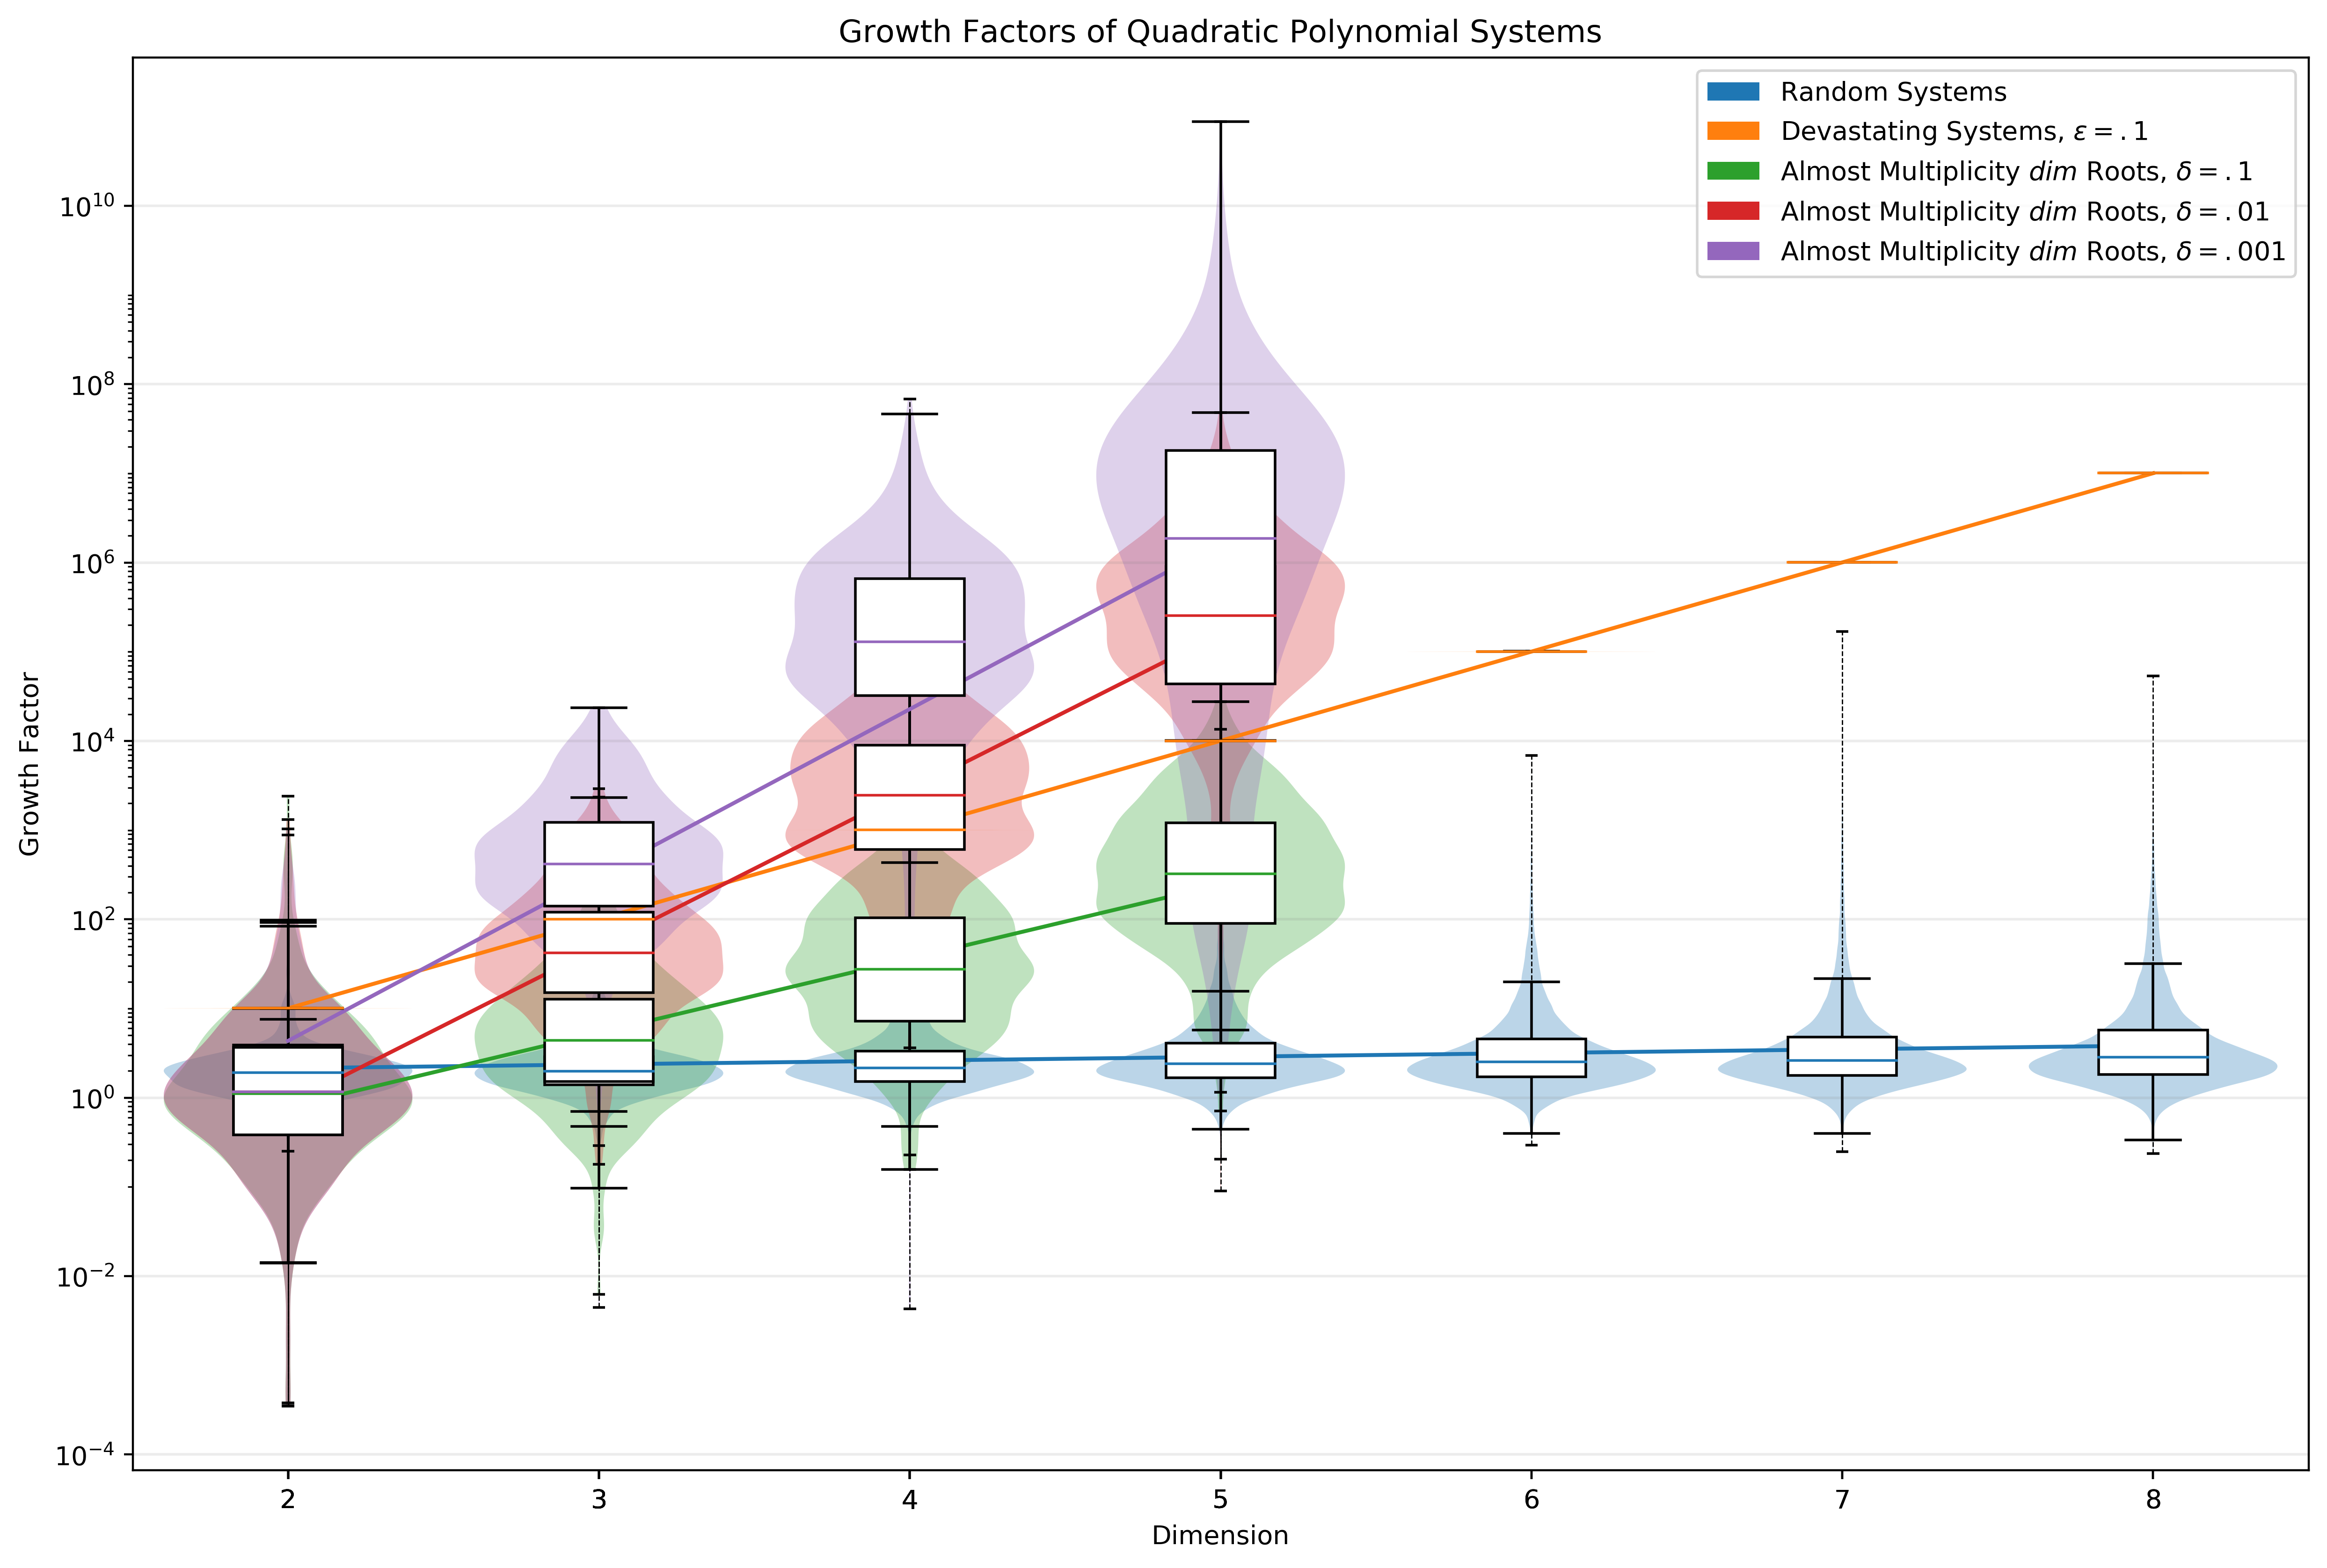

In [50]:
plot([rand_polished,
      dev_polished,
      mult1,
      mult01,
      mult001],
     ['Random Systems',
      r'Devastating Systems, $\epsilon=.1$',
      r'Almost Multiplicity $dim$ Roots, $\delta=.1$',
      r'Almost Multiplicity $dim$ Roots, $\delta=.01$',
      r'Almost Multiplicity $dim$ Roots, $\delta=.001$'],
     figsize=(15,10))

Almost Multiplicity $dim$ Roots, $\delta=.1$
Slope: 0.8316772512275539 
Intercept: -1.7679150204059404

Almost Multiplicity $dim$ Roots, $\delta=.01$
Slope: 1.758836658103921 
Intercept: -3.5881753801861267

Almost Multiplicity $dim$ Roots, $\delta=.001$
Slope: 1.8594416990635558 
Intercept: -3.081371020552708



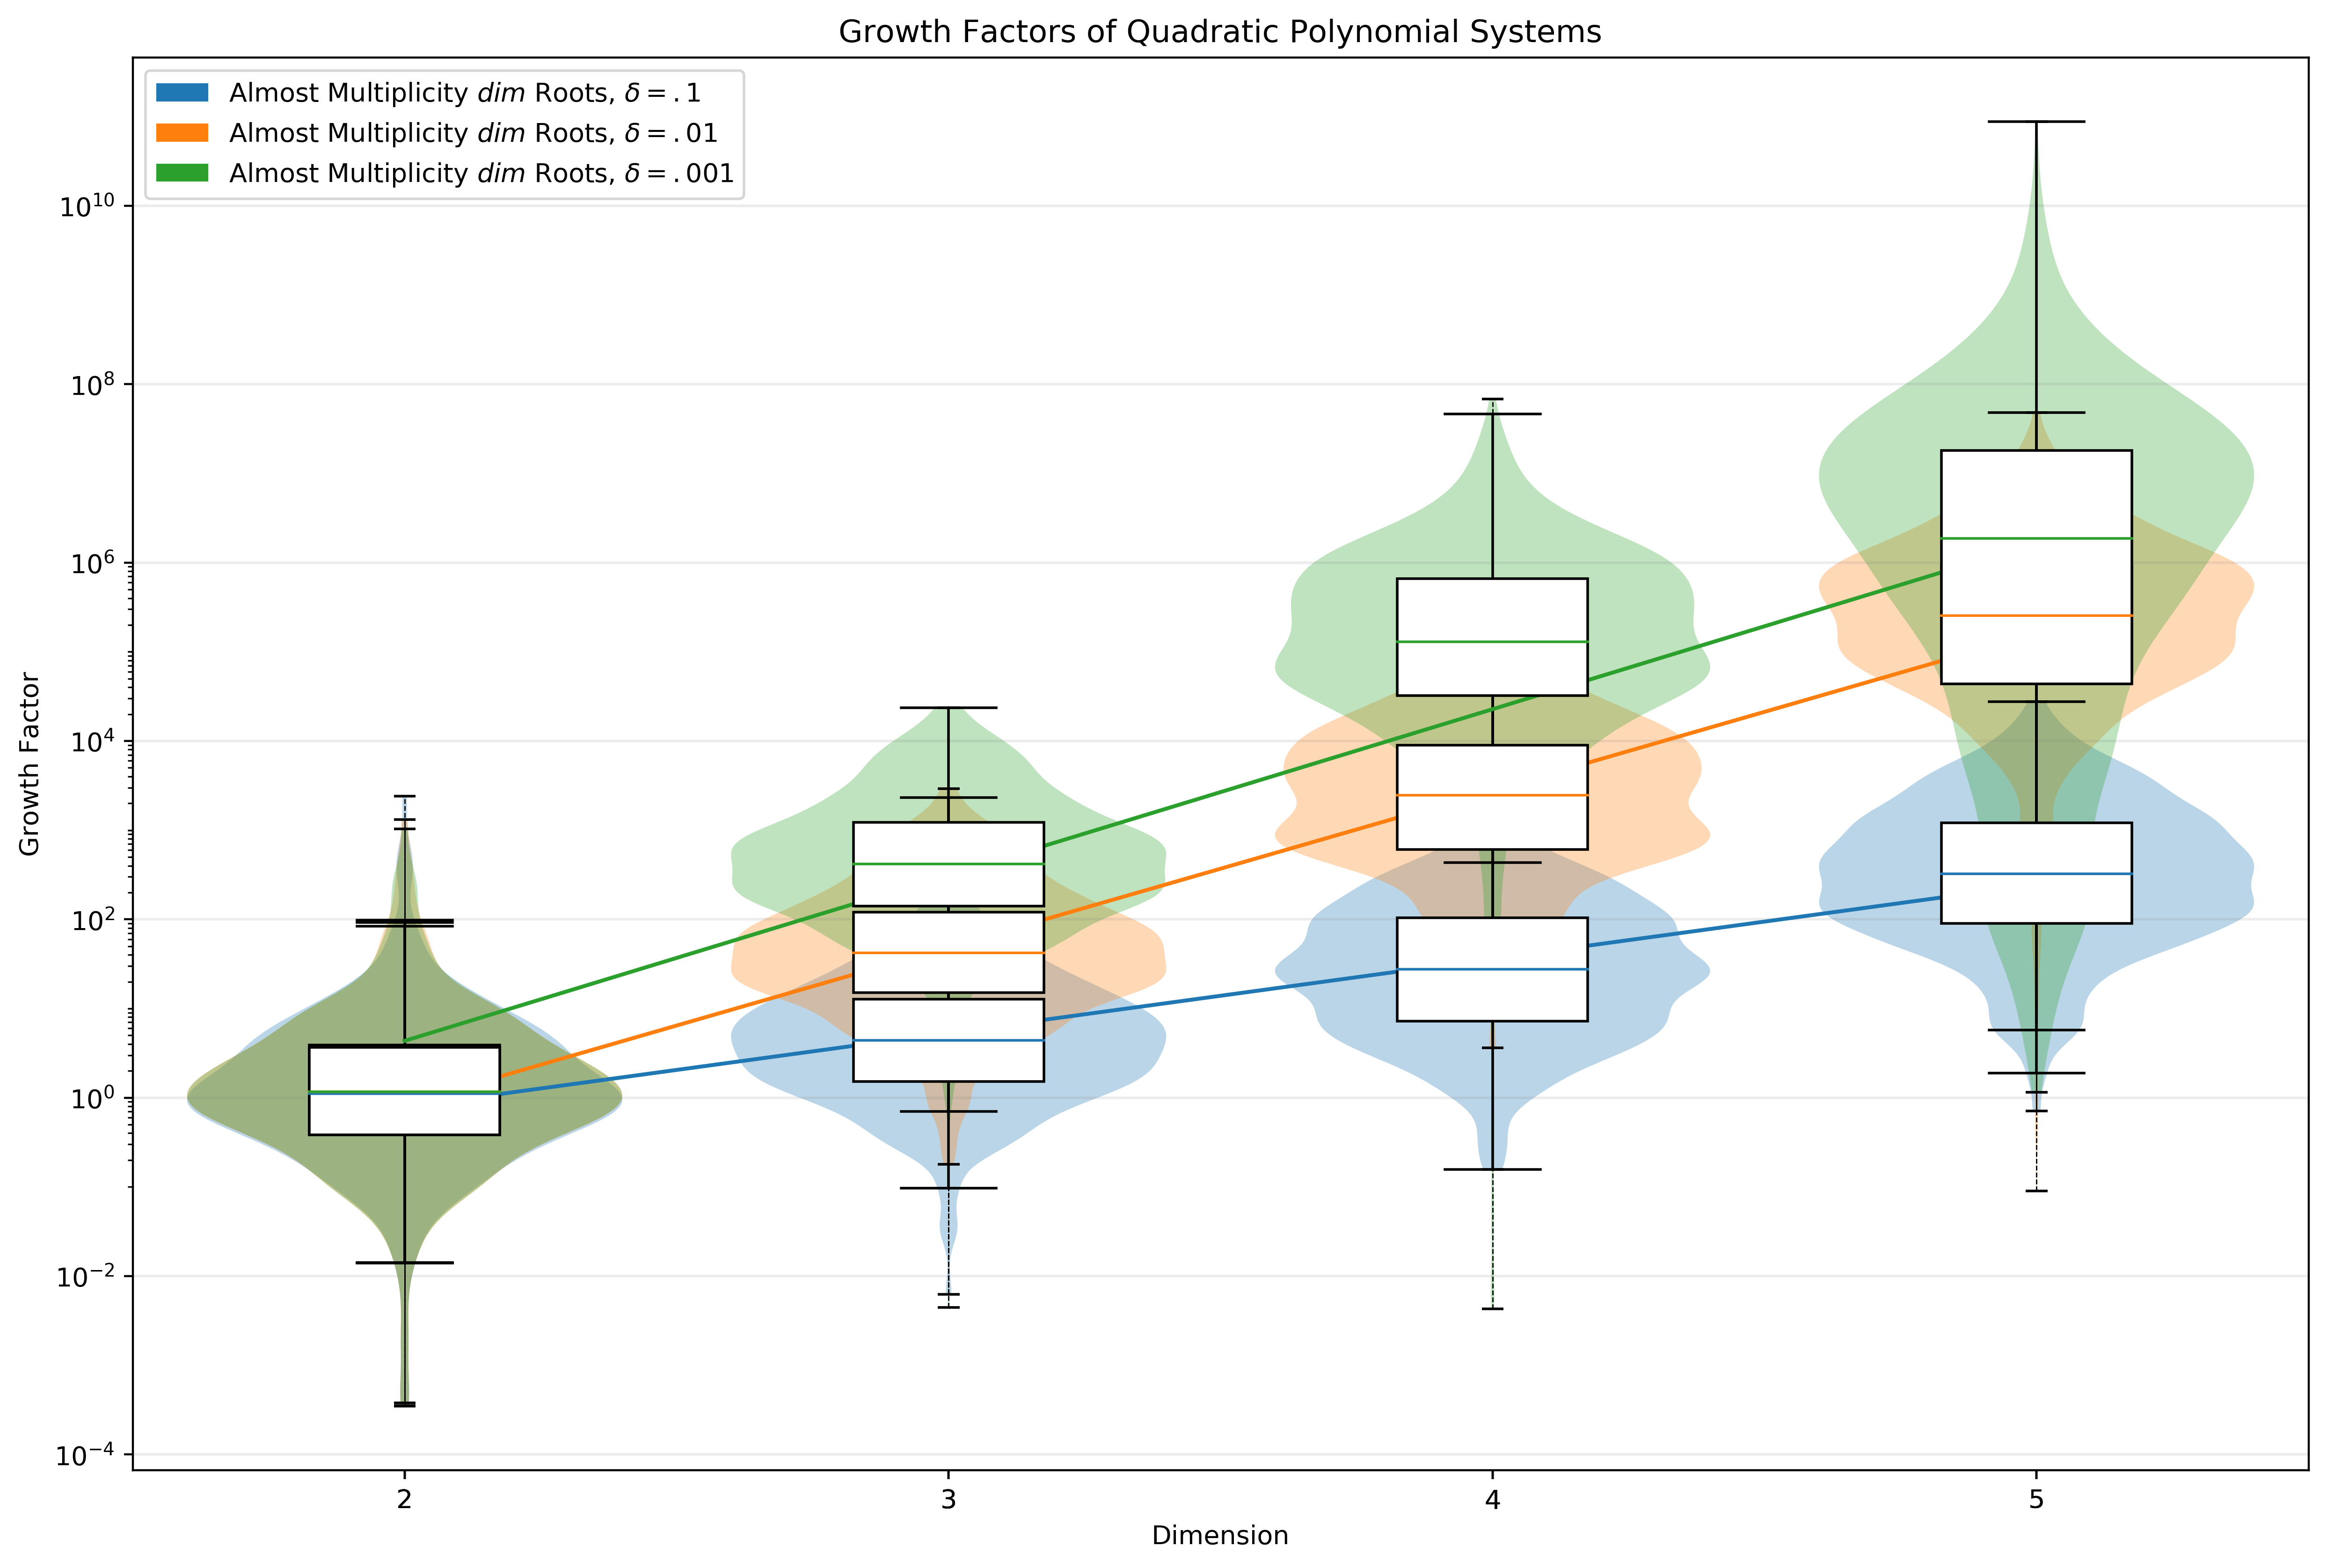

In [51]:
plot([mult1,
      mult01,
      mult001],
     [r'Almost Multiplicity $dim$ Roots, $\delta=.1$',
      r'Almost Multiplicity $dim$ Roots, $\delta=.01$',
      r'Almost Multiplicity $dim$ Roots, $\delta=.001$'],
     figsize=(15,10))

### double, not multiple roots

In [52]:
doub1 = get_data(delta=.1,gen_func=gen_almost_double_roots)

2
3
4
5


In [53]:
doub01 = get_data(delta=.01,gen_func=gen_almost_double_roots)

2
3
4
5


In [54]:
doub001 = get_data(delta=.001,gen_func=gen_almost_double_roots)

2
3
4
5


Almost Double Roots, $\delta=.1$
Slope: -0.043898729795181765 
Intercept: 0.12098224578658237

Almost Double Roots, $\delta=.01$
Slope: -0.03630011249258382 
Intercept: 0.12442380149280148

Almost Double Roots, $\delta=.001$
Slope: -0.0358764566808036 
Intercept: 0.12415207281342298



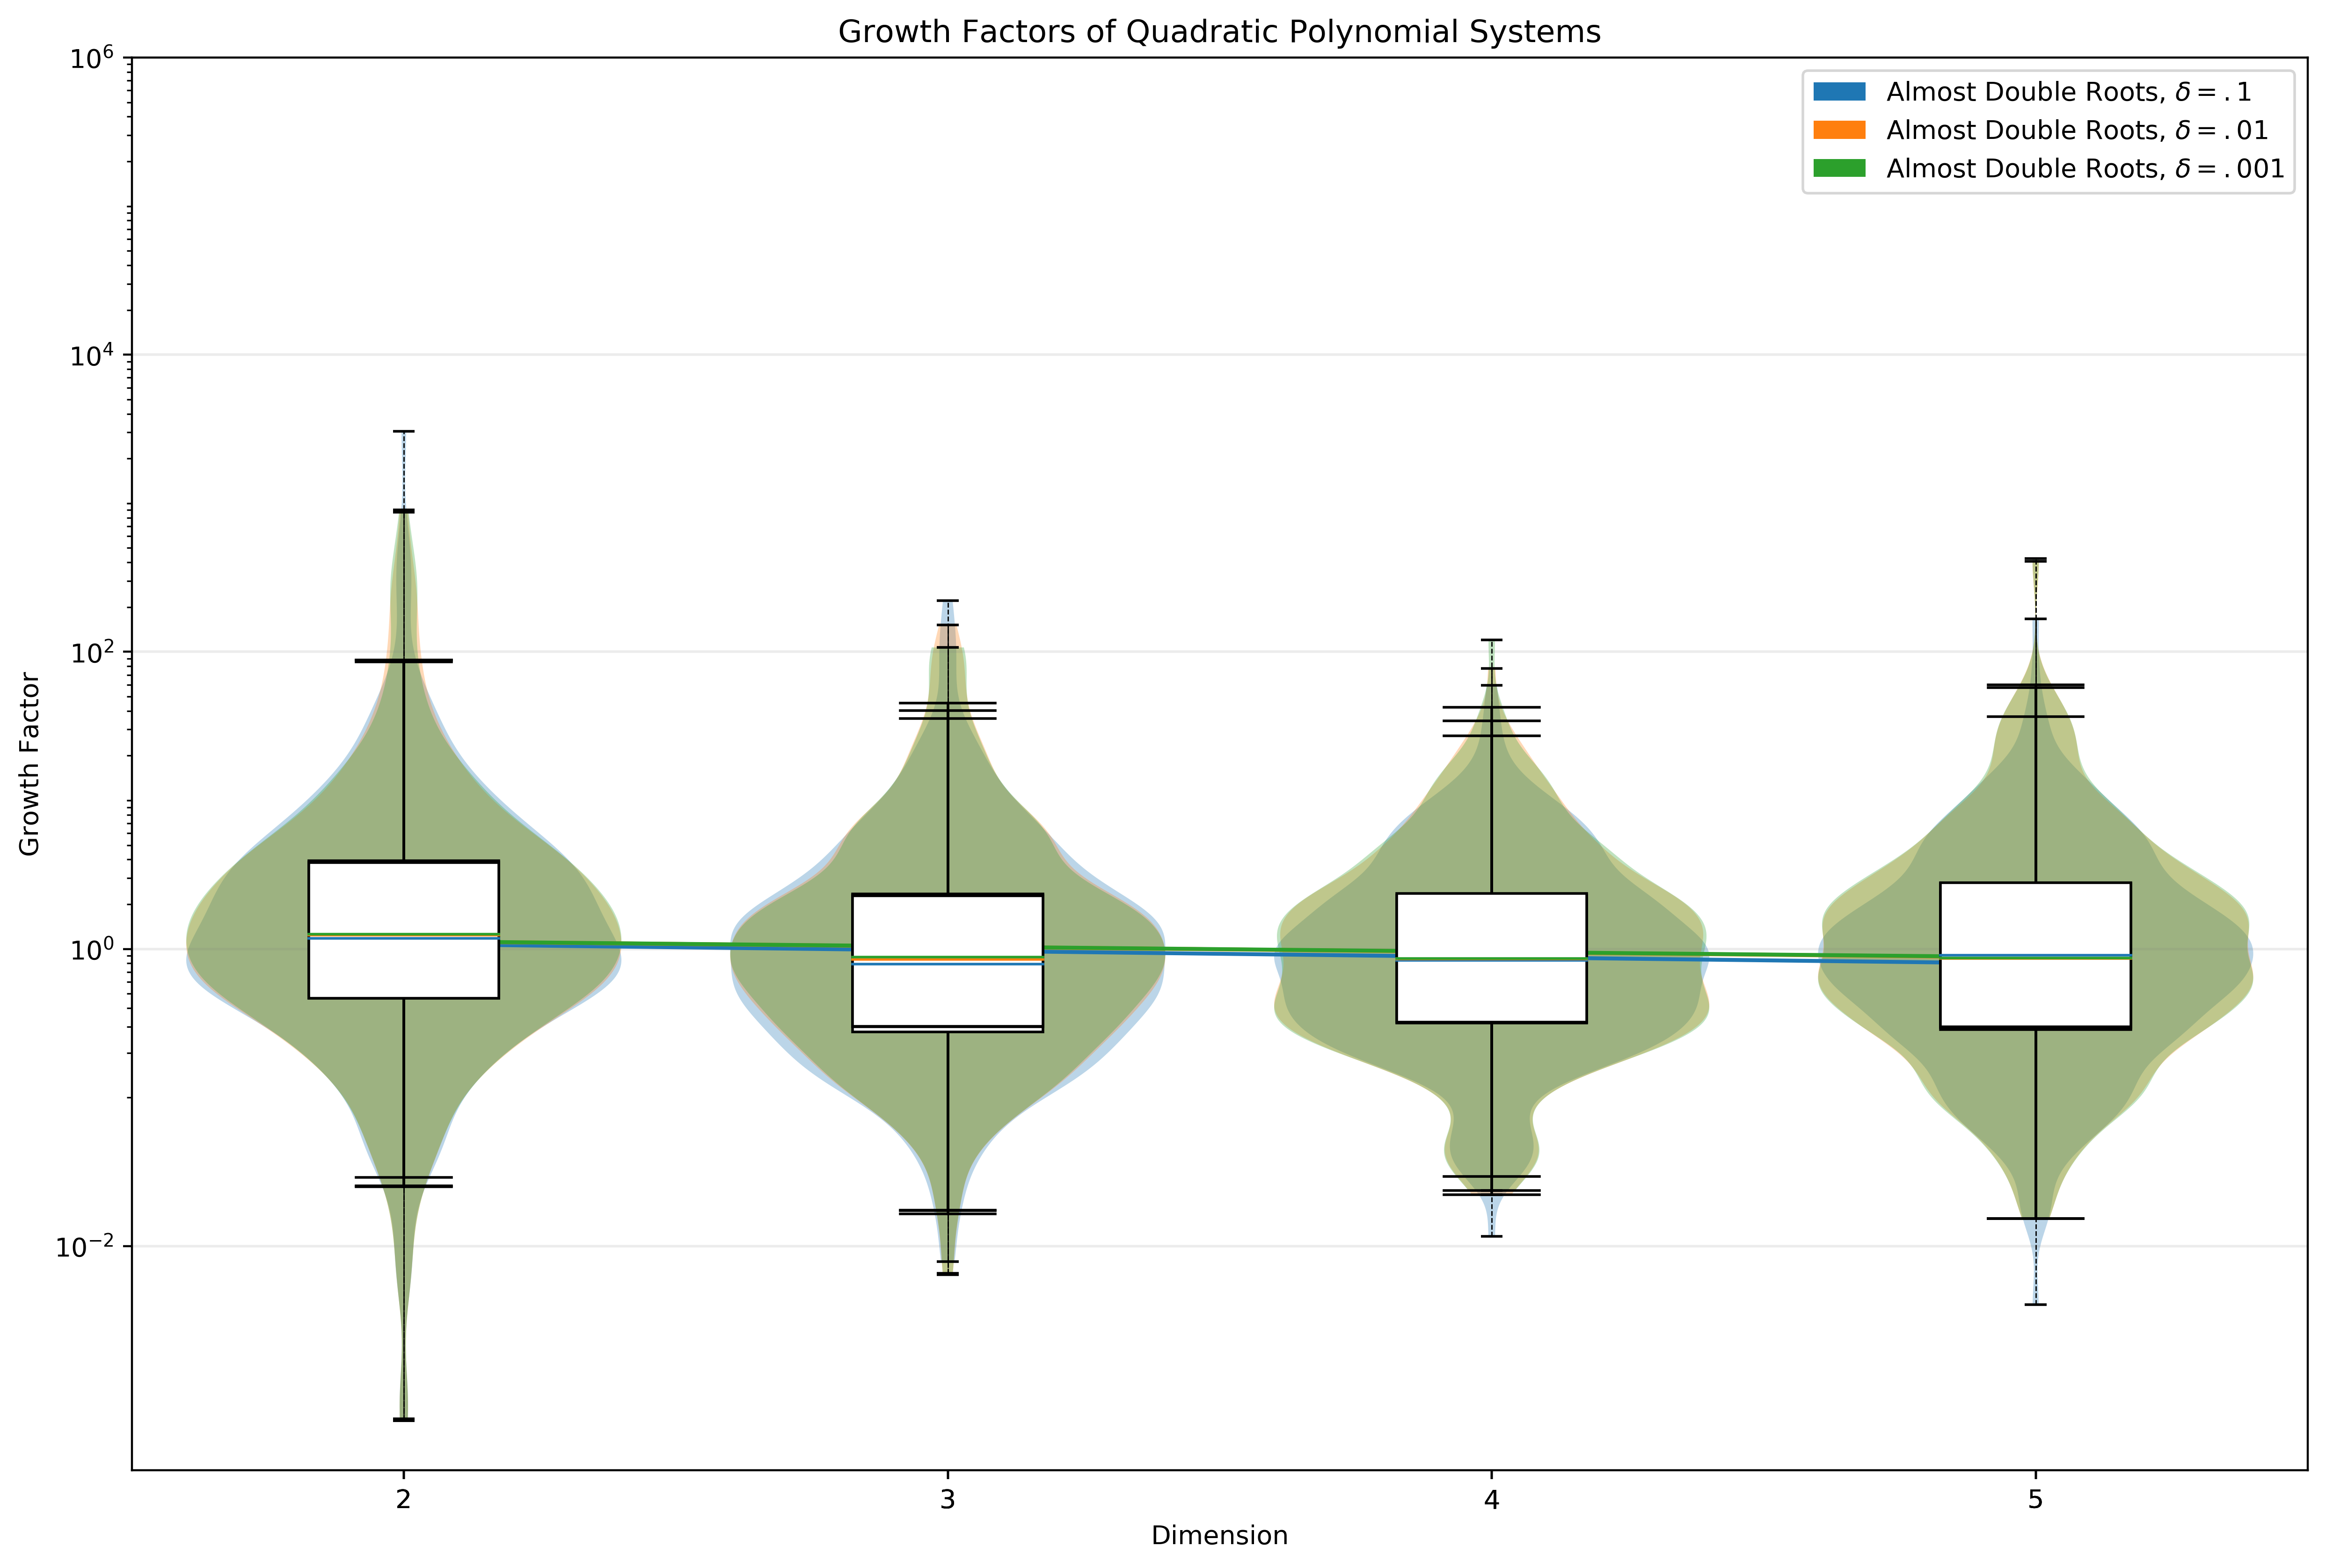

In [55]:
plot([doub1,
      doub01,
      doub001],
     [r'Almost Double Roots, $\delta=.1$',
      r'Almost Double Roots, $\delta=.01$',
      r'Almost Double Roots, $\delta=.001$'],
     figsize=(15,10))

# Generate Random Hyperellipse Systems

In [56]:
rand1 = get_data(delta=.1,gen_func=gen_rand_hyperellipses)

2
3
4
5


Random Hyperellipse/Hyperbola Systems
Slope: -0.08426763832775994 
Intercept: 0.07353956302763348



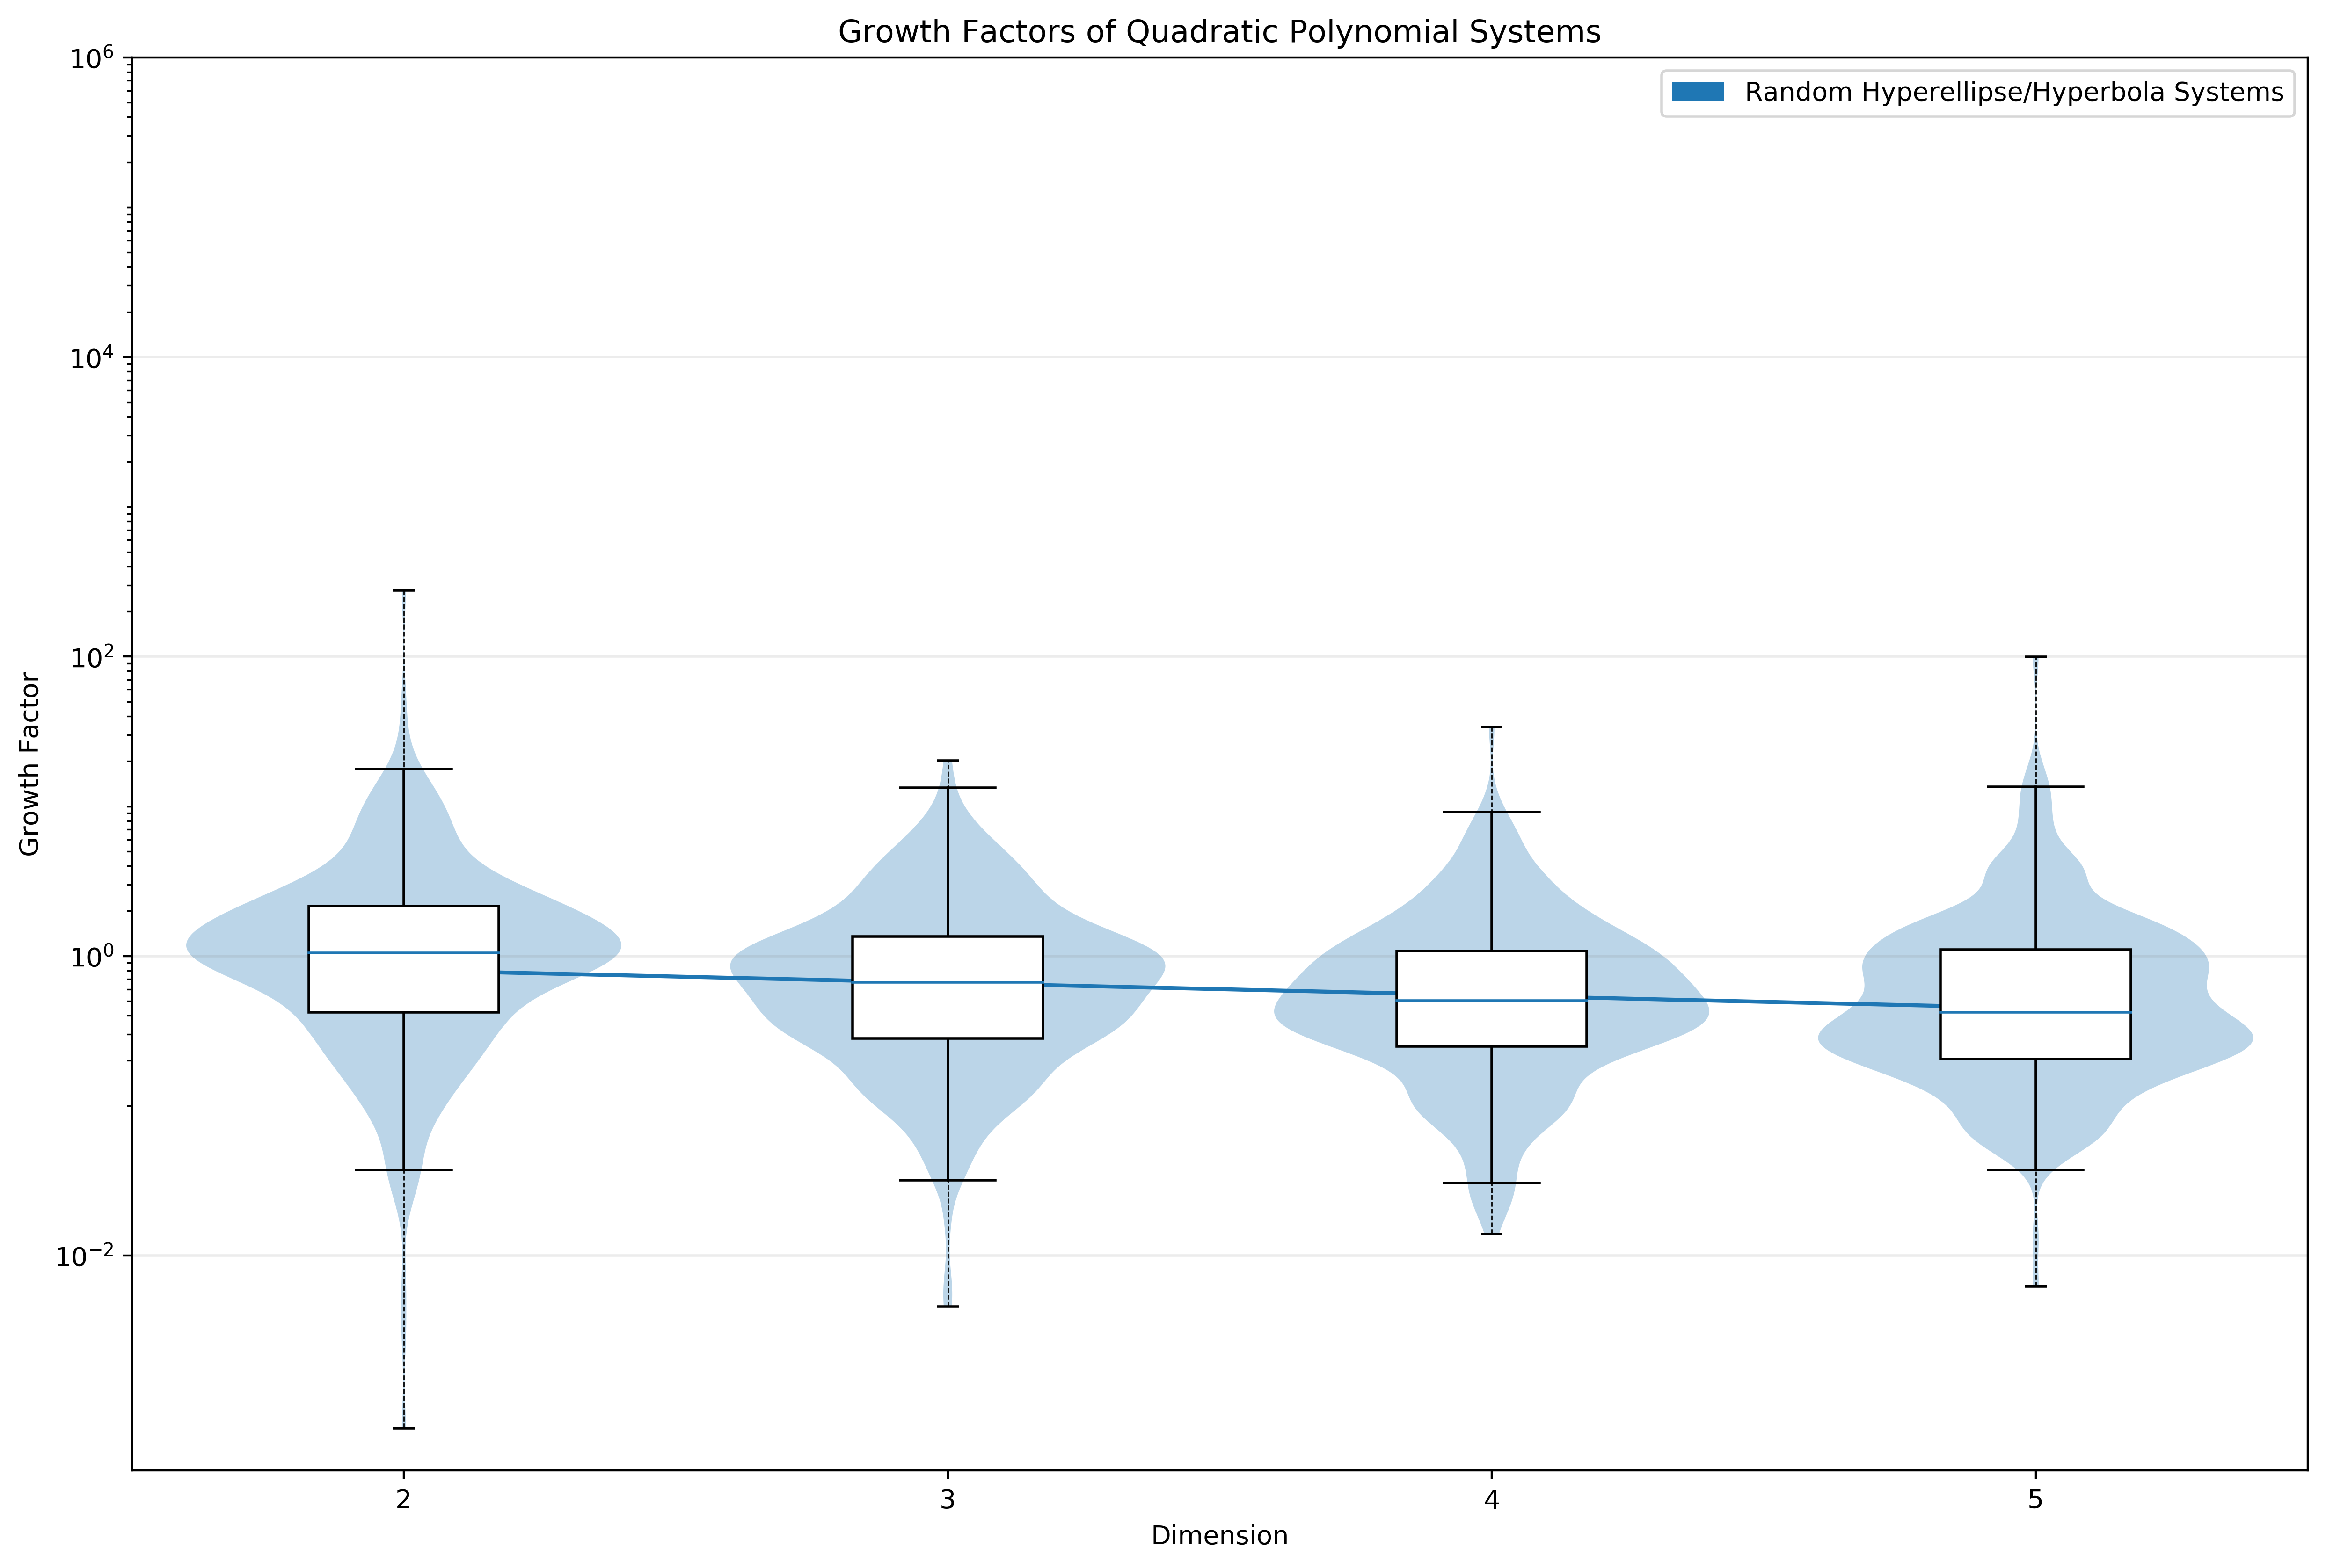

In [69]:
plot([rand1],
     [r'Random Hyperellipse/Hyperbola Systems'],
     figsize=(15,10))